#### TRABALHO DE IAA002 – Linguagem de Programação Aplicada
#### EQUIPE 23:
#### Albino Bogucheski Junior
#### Beatriz Leandro Bonafini
#### Cicero Samuel Rodrigues Mendes
#### Fernanda Batista de Oliveira
#### Marcos Antonio Nespolo Junior
#### Rodrigo Rolim Veras

# 1 Análise Exploratória dos dados

#### A partir da base de dados precos_carros_brasil.csv, execute as seguintes tarefas:
#### a. Carregue a base de dados media_precos_carros_brasil.csv


In [111]:
# Biblioteca Pandas - Manipulação de dados
import pandas as pd
# Biblioteca Seaborn - Criação de gráficos
import seaborn as sns
# Biblioteca Matplotlib - Criação de gráficos
import matplotlib.pyplot as plt

# Biblioteca para ignorar mensagens de warning (aviso) ao rodar uma célula de código
import warnings
warnings.filterwarnings('ignore')

# Bibliotecas de machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# Métricas de avaliação dos modelos
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Função read_csv para importar os dados
dados = pd.read_csv('precos_carros_brasil.csv')

In [112]:
dados

,year_of_reference,month_of_reference,fipe_code,authentication,brand,model,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,004001-0,cfzlctzfwrcp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,004001-0,cdqwxwpw3y2p,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,004001-0,cb1t3xwwj1xp,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,004001-0,cb9gct6j65r0,GM - Chevrolet,Corsa Wind 1.0 MPFI / EFI 2p,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,004003-7,g15wg0gbz1fx,GM - Chevrolet,Corsa Pick-Up GL/ Champ 1.6 MPFI / EFI,Gasoline,manual,"1,6",2001.0,12525.0
...,...,...,...,...,...,...,...,...,...,...,...
267537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267539,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [113]:
# Remove colunas que não serão usadas
dados.drop(['fipe_code','authentication','model'], axis=1, inplace=True)


#### b. Verifique se há valores faltantes nos dados. Caso haja, escolha uma tratativa para resolver o problema de valores faltantes

In [114]:
# Verifica se existem valores faltantes
dados.isna().any()

year_of_reference     True
month_of_reference    True
brand                 True
fuel                  True
gear                  True
engine_size           True
year_model            True
avg_price_brl         True
dtype: bool

In [115]:
# Substituir os valores faltantes por "-". Argumento inplace = true significa que a modificação será aplicada  
# Na mesma variável - chamada dados - sem precisar criar outra variável (dados_2, dados_V2, etc)
dados.fillna('-', inplace=True)

#### c. Verifique se há dados duplicados nos dados

In [116]:
# Verificando se temos valores duplicados
dados.duplicated().sum() 


65507

In [117]:
# Removendo valores duplicados
dados.drop_duplicates(inplace=True)


#### d. Crie duas categorias, para separar colunas numéricas e categóricas. Imprima o resumo de informações das variáveis numéricas e categóricas (estatística descritiva dos dados)

In [118]:
# Imprime o tipo de dado em cada coluna
dados.dtypes

year_of_reference     object
month_of_reference    object
brand                 object
fuel                  object
gear                  object
engine_size           object
year_model            object
avg_price_brl         object
dtype: object

In [119]:
dados.head()

,year_of_reference,month_of_reference,brand,fuel,gear,engine_size,year_model,avg_price_brl
0,2021.0,January,GM - Chevrolet,Gasoline,manual,1,2002.0,9162.0
1,2021.0,January,GM - Chevrolet,Gasoline,manual,1,2001.0,8832.0
2,2021.0,January,GM - Chevrolet,Gasoline,manual,1,2000.0,8388.0
3,2021.0,January,GM - Chevrolet,Alcohol,manual,1,2000.0,8453.0
4,2021.0,January,GM - Chevrolet,Gasoline,manual,"1,6",2001.0,12525.0


In [120]:
# Verifica quantas linhas o arquivo possui
print(len(dados))

202035


In [121]:
# Converter colunas
dados['year_of_reference'] = pd.to_numeric(dados['year_of_reference'], errors='coerce').astype('Int64')
dados['year_model'] = pd.to_numeric(dados['year_model'], errors='coerce').astype('Int64')
dados['engine_size'] = dados['engine_size'].str.replace(',', '.')
dados['engine_size'] = pd.to_numeric(dados['engine_size'], errors='coerce')
dados['avg_price_brl'] = pd.to_numeric(dados['avg_price_brl'], errors='coerce')
# Remover linhas com NaN
dados.dropna(inplace=True)

In [122]:
print(len(dados))

202034


In [123]:
dados.head()

,year_of_reference,month_of_reference,brand,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,GM - Chevrolet,Gasoline,manual,1.0,2002,9162.0
1,2021,January,GM - Chevrolet,Gasoline,manual,1.0,2001,8832.0
2,2021,January,GM - Chevrolet,Gasoline,manual,1.0,2000,8388.0
3,2021,January,GM - Chevrolet,Alcohol,manual,1.0,2000,8453.0
4,2021,January,GM - Chevrolet,Gasoline,manual,1.6,2001,12525.0


In [124]:
# Criando categorias para separar colunas numéricas e categóricas: facilita a AED
numericas_cols = [col for col in dados.columns if dados[col].dtype != 'object']
categoricas_cols = [col for col in dados.columns if dados[col].dtype == 'object']

In [125]:
# Resumo das variáveis numéricas - Imprime alguns valores de medidas de tendências centrais 
dados[numericas_cols].describe()

,year_of_reference,engine_size,year_model,avg_price_brl
count,202034.0,202034.000000,202034.0,202034.000000
mean,2021.564776,1.822531,2011.271083,52769.227769
std,0.571917,0.734701,6.377497,51642.208580
min,2021.0,1.000000,2000.0,6647.000000
25%,2021.0,1.400000,2006.0,22854.000000
50%,2022.0,1.600000,2012.0,38031.000000
75%,2022.0,2.000000,2016.0,64090.000000
max,2023.0,6.200000,2023.0,979358.000000


In [126]:
# Resumo das variáveis categóricas - Imprime alguns valores de estatística descritiva
dados[categoricas_cols].describe()

,month_of_reference,brand,fuel,gear
count,202034,202034,202034,202034
unique,12,6,3,2
top,January,Fiat,Gasoline,manual
freq,24221,44895,168451,161656


#### e. Imprima a contagem de valores por modelo (model) e marca do carro (brand)

In [127]:
# Contagem do nº de carros por marca
carros_por_marca = dados['brand'].value_counts()
print(carros_por_marca)

brand
Fiat               44895
VW - VolksWagen    44216
GM - Chevrolet     38563
Ford               33131
Renault            29147
Nissan             12082
Name: count, dtype: int64


# 2 Visualização dos dados

#### A partir da base de dados precos_carros_brasil.csv, execute as seguintes tarefas:
#### a. Gere um gráfico da distribuição da quantidade de carros por marca

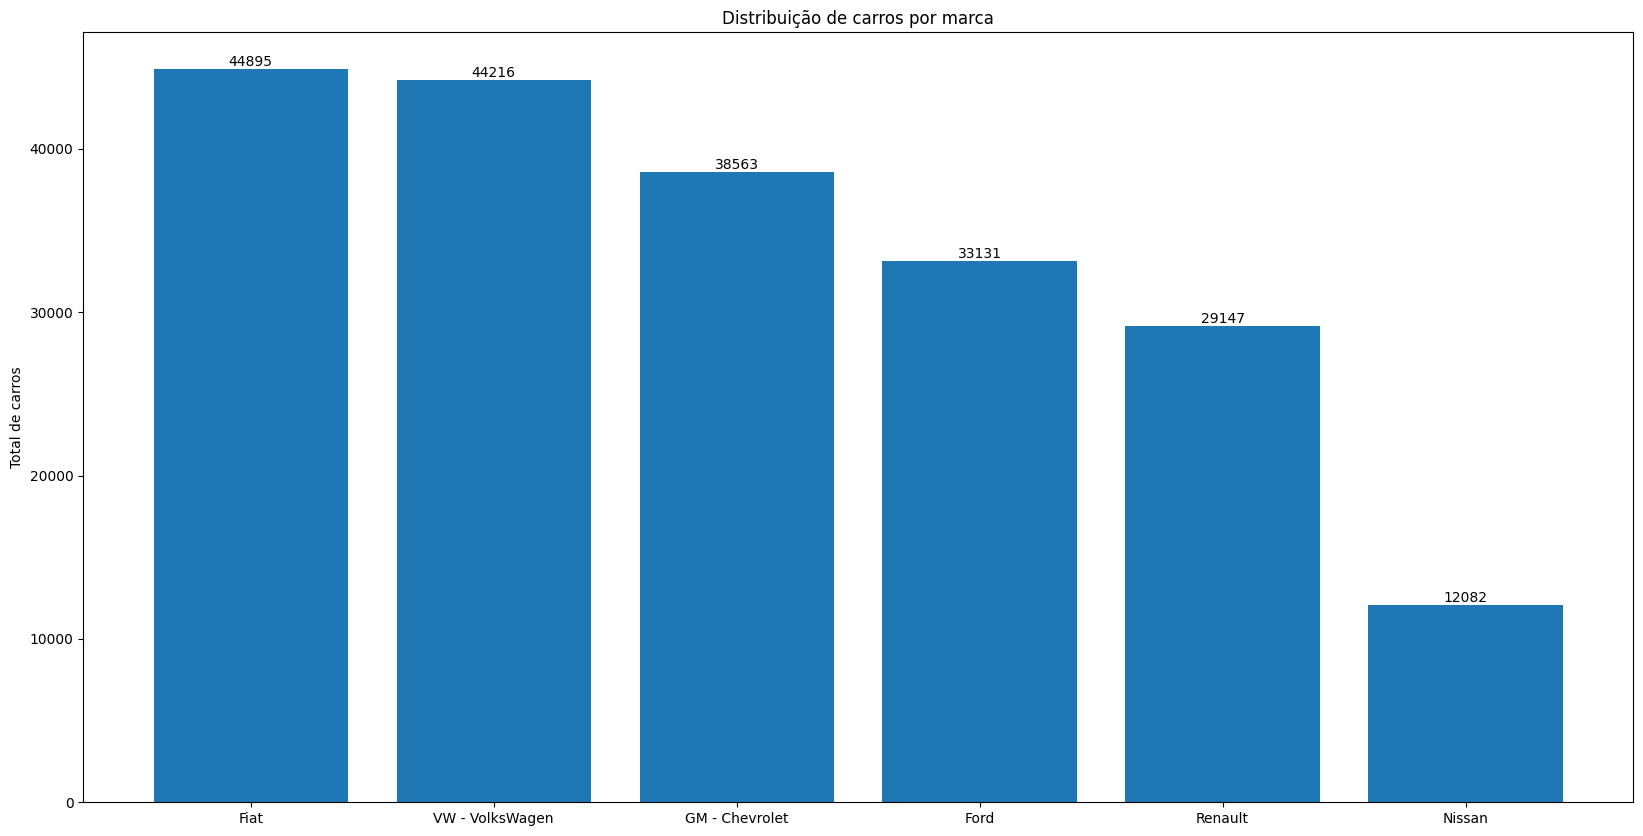

In [128]:
# Gráfico da distribuição por marca
plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
grafico_1 = plt.bar(carros_por_marca.index, carros_por_marca.values) # Variavel carros_por_marca no eixo X
plt.title('Distribuição de carros por marca') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros'); # # plt.ylabel para inserir título no gráfico
plt.bar_label(grafico_1, size=10);

#### b. Gere um gráfico da distribuição da quantidade de carros por tipo de engrenagem do carro

In [129]:
# Contagem do nº de carros por engrenagem
carros_por_engrenagem = dados['gear'].value_counts()
print(carros_por_engrenagem)

gear
manual       161656
automatic     40378
Name: count, dtype: int64


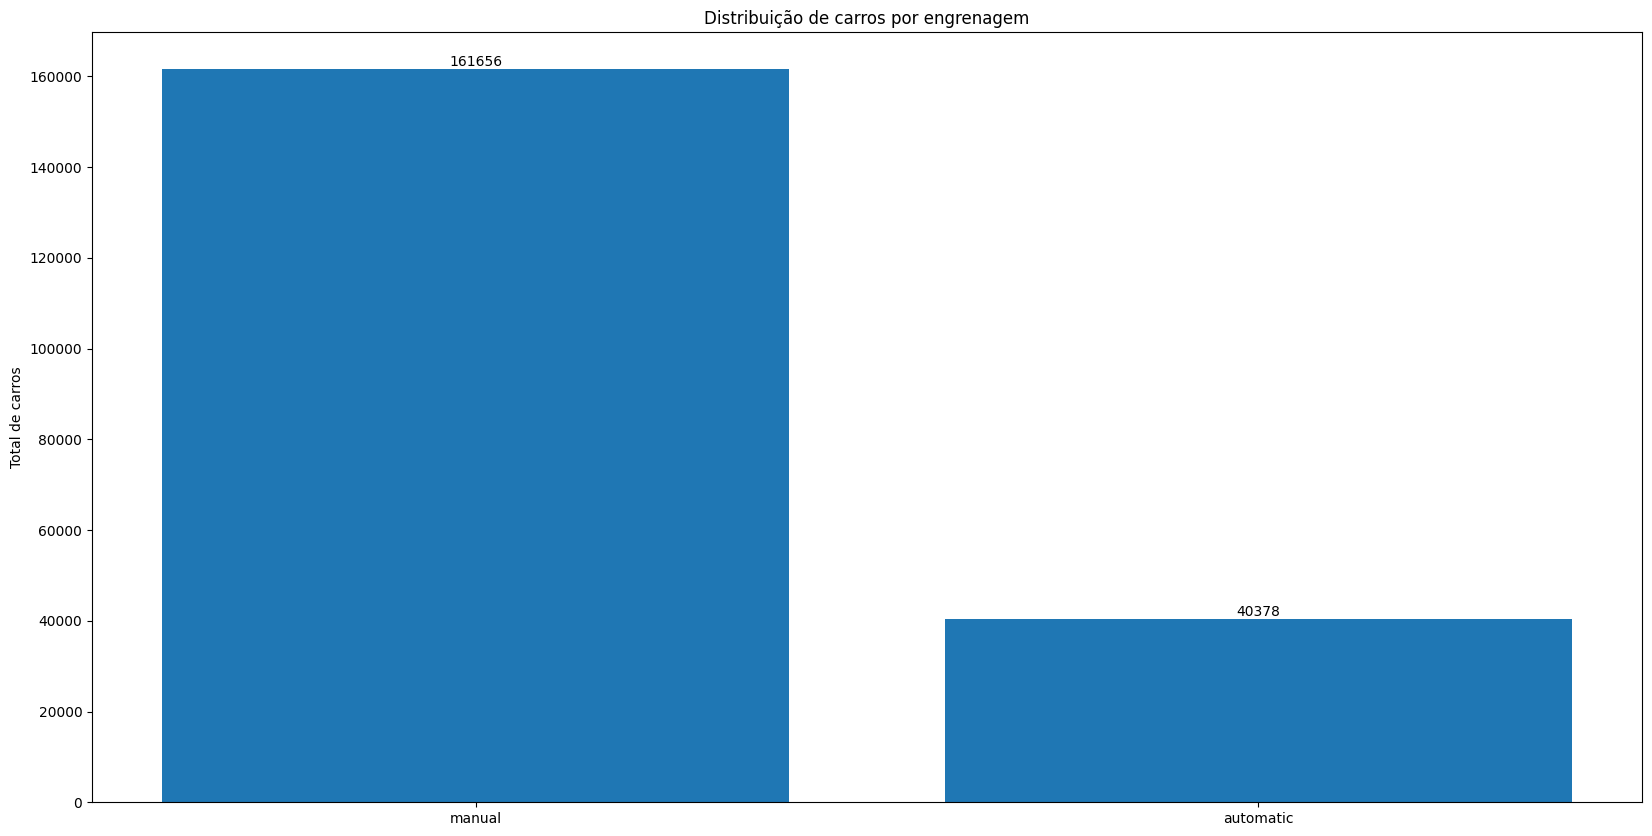

In [130]:
# Gráfico da distribuição por engrenagem
plt.figure(figsize=(20,10)) # Aumentar o tamanho da figura na saída dos dados
grafico_1 = plt.bar(carros_por_engrenagem.index, carros_por_engrenagem.values) # Variavel carros_por_engrenagem no eixo X
plt.title('Distribuição de carros por engrenagem') # plt.title para inserir título no gráfico
plt.ylabel('Total de carros'); # # plt.ylabel para inserir título no gráfico
plt.bar_label(grafico_1, size=10);

In [131]:
dados.head()

,year_of_reference,month_of_reference,brand,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,January,GM - Chevrolet,Gasoline,manual,1.0,2002,9162.0
1,2021,January,GM - Chevrolet,Gasoline,manual,1.0,2001,8832.0
2,2021,January,GM - Chevrolet,Gasoline,manual,1.0,2000,8388.0
3,2021,January,GM - Chevrolet,Alcohol,manual,1.0,2000,8453.0
4,2021,January,GM - Chevrolet,Gasoline,manual,1.6,2001,12525.0


#### c. Gere um gráfico da evolução da média de preço dos carros ao longo dos meses de 2022 (variável de tempo no eixo X)

In [132]:
# Filtrar carros de 2022
carros_2022 = dados[dados['year_of_reference'] == 2022]
carros_2022.head()

,year_of_reference,month_of_reference,brand,fuel,gear,engine_size,year_model,avg_price_brl
96280,2022,January,GM - Chevrolet,Gasoline,manual,1.0,2002,12330.0
96281,2022,January,GM - Chevrolet,Gasoline,manual,1.0,2001,11408.0
96282,2022,January,GM - Chevrolet,Gasoline,manual,1.0,2000,10620.0
96283,2022,January,GM - Chevrolet,Alcohol,manual,1.0,2000,11992.0
96284,2022,January,GM - Chevrolet,Gasoline,manual,1.6,2001,17182.0


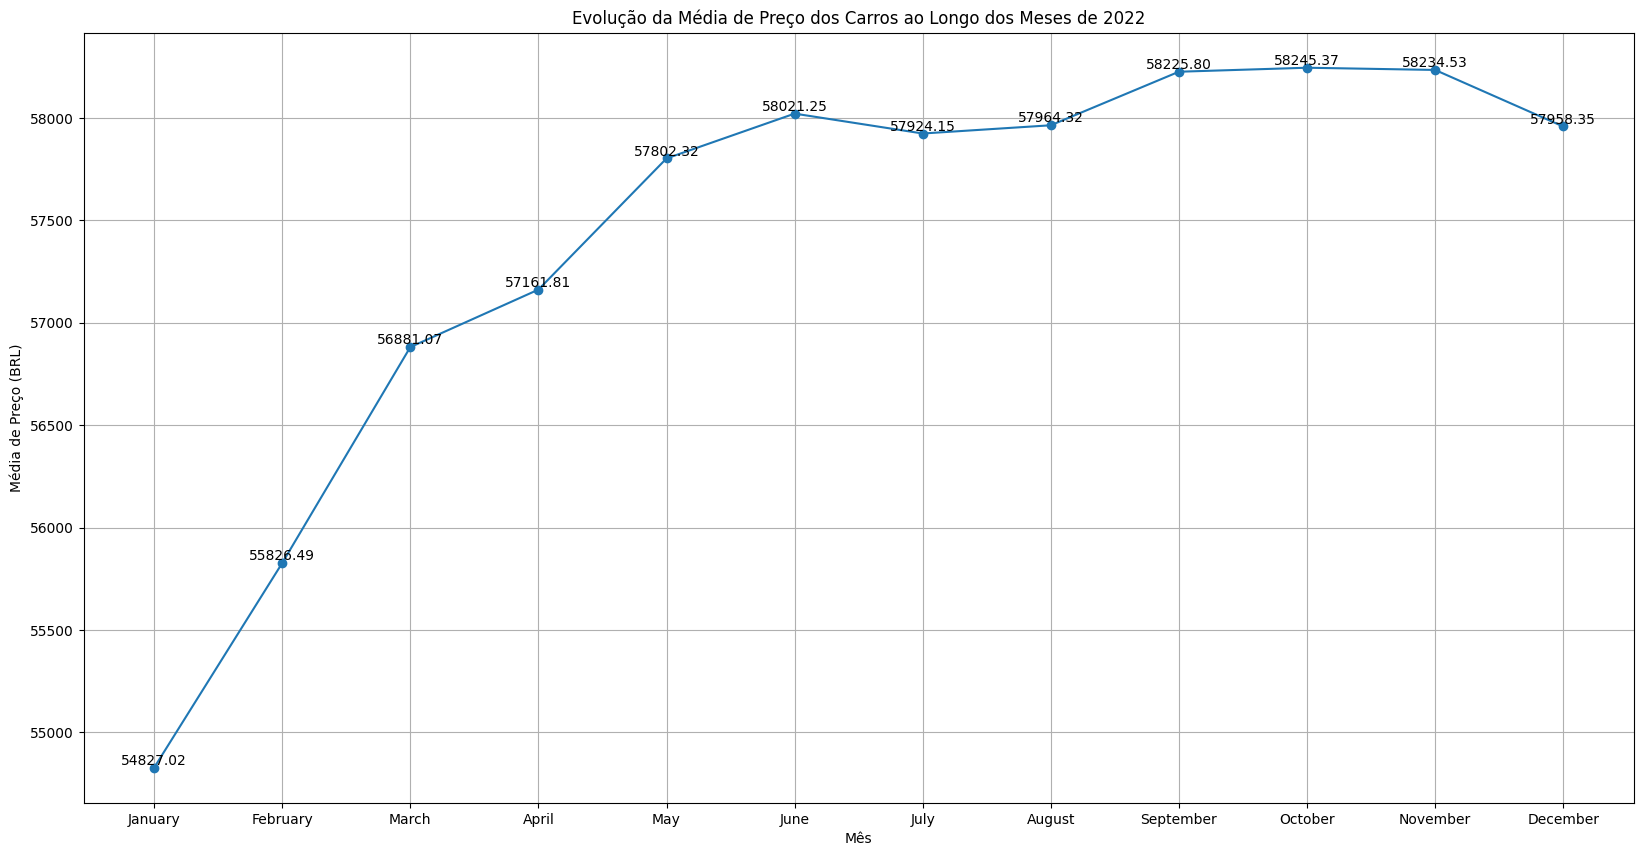

In [133]:
# Certificar que 'month_of_reference' seja do tipo categórico com os meses na ordem correta
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
carros_2022['month_of_reference'] = pd.Categorical(carros_2022['month_of_reference'], categories=months_order, ordered=True)

# Agrupar por 'month_of_reference' e calcular a média de 'avg_price_brl'
monthly_avg_prices = carros_2022.groupby('month_of_reference')['avg_price_brl'].mean()

# Gerar o gráfico
plt.figure(figsize=(20, 10))
plt.plot(monthly_avg_prices.index, monthly_avg_prices.values, marker='o')

# Adicionando os valores de preço como anotações no gráfico
for i, price in enumerate(monthly_avg_prices.values):
    plt.text(monthly_avg_prices.index[i], price, f'{price:.2f}', ha='center', va='bottom')

# Adicionando títulos e rótulos
plt.title('Evolução da Média de Preço dos Carros ao Longo dos Meses de 2022')
plt.xlabel('Mês')
plt.ylabel('Média de Preço (BRL)')
plt.grid(True)

# Ajustando os rótulos do eixo x para mostrar os nomes dos meses
plt.xticks(range(len(monthly_avg_prices.index)), monthly_avg_prices.index)
plt.grid(True)

# Mostrar o gráfico
plt.show()

#### d. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de engrenagem

In [134]:
# Agrupa dados por marca e tipo de engrenagem
brand_gear_avg_prices = dados.groupby(['brand', 'gear'])['avg_price_brl'].mean()
print(brand_gear_avg_prices)

brand            gear     
Fiat             automatic    97395.590595
                 manual       39693.907626
Ford             automatic    84787.814148
                 manual       51792.981618
GM - Chevrolet   automatic    88170.124407
                 manual       52138.805272
Nissan           automatic    94168.516422
                 manual       52683.641804
Renault          automatic    44050.760434
                 manual       47637.906015
VW - VolksWagen  automatic    99760.745541
                 manual       40399.598812
Name: avg_price_brl, dtype: float64


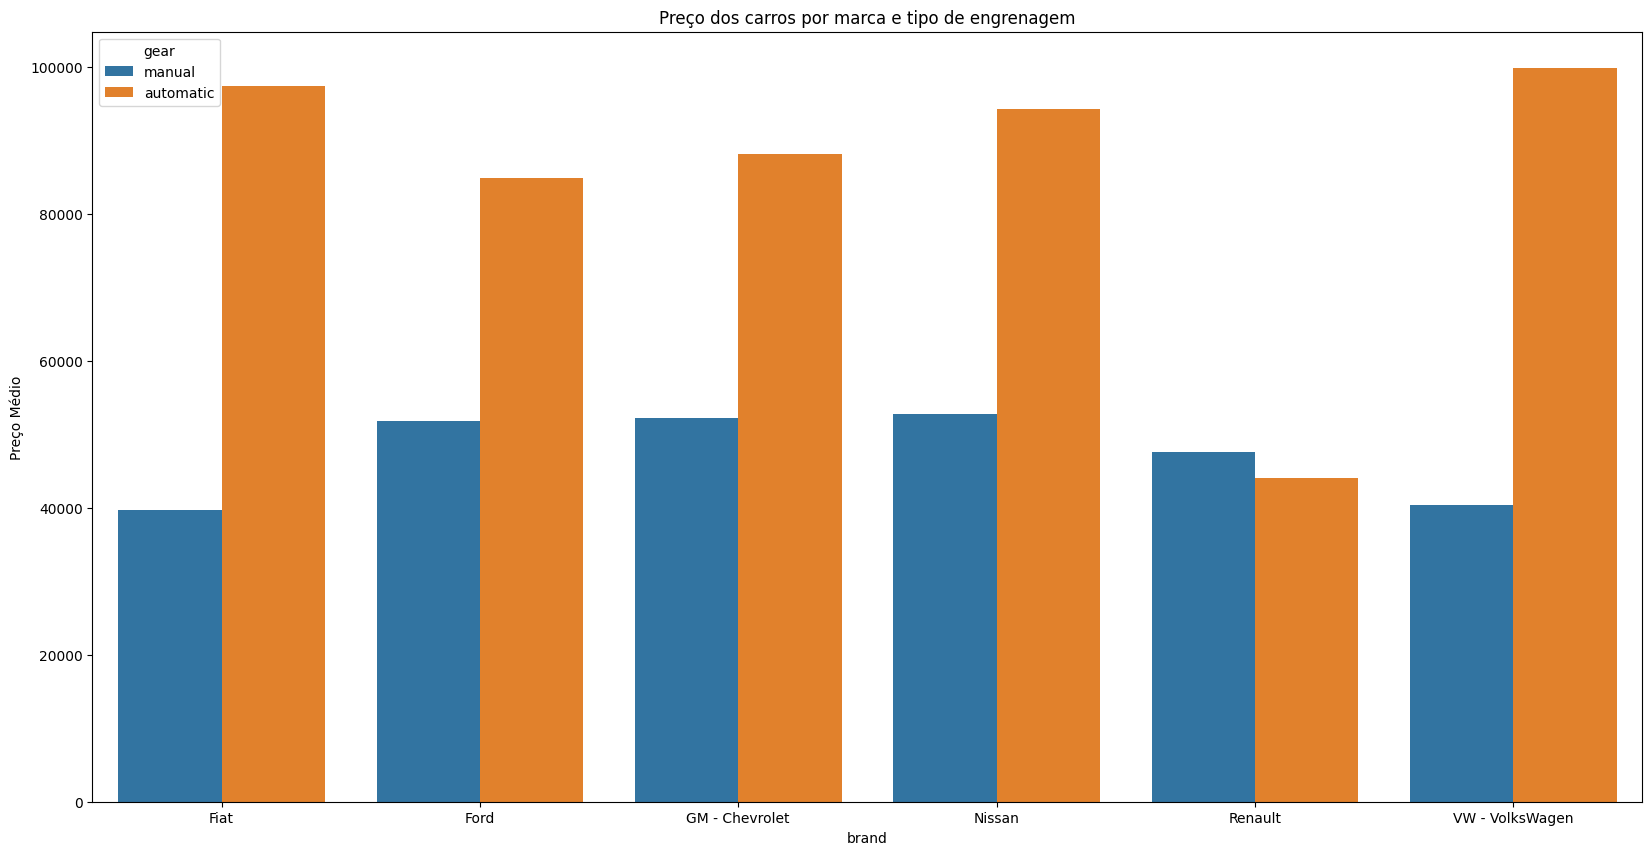

In [135]:
# Filtrar para remover as linhas onde a marca é '-'
brand_gear_avg_prices_filtered = brand_gear_avg_prices[brand_gear_avg_prices.index.get_level_values('brand') != '-']

# Resetando o índice para transformar a Series com índice multinível em um DataFrame
brand_gear_avg_prices_df = brand_gear_avg_prices_filtered.reset_index()

# Cria gráfico de marca por tipo de engranagem
plt.figure(figsize=(20,10))
sns.barplot(x='brand', y='avg_price_brl', hue='gear', data=brand_gear_avg_prices_df, hue_order=['manual','automatic'])
plt.title('Preço dos carros por marca e tipo de engrenagem')
plt.ylabel('Preço Médio')
plt.show()


#### f. Gere um gráfico da distribuição da média de preço dos carros por marca e tipo de combustível

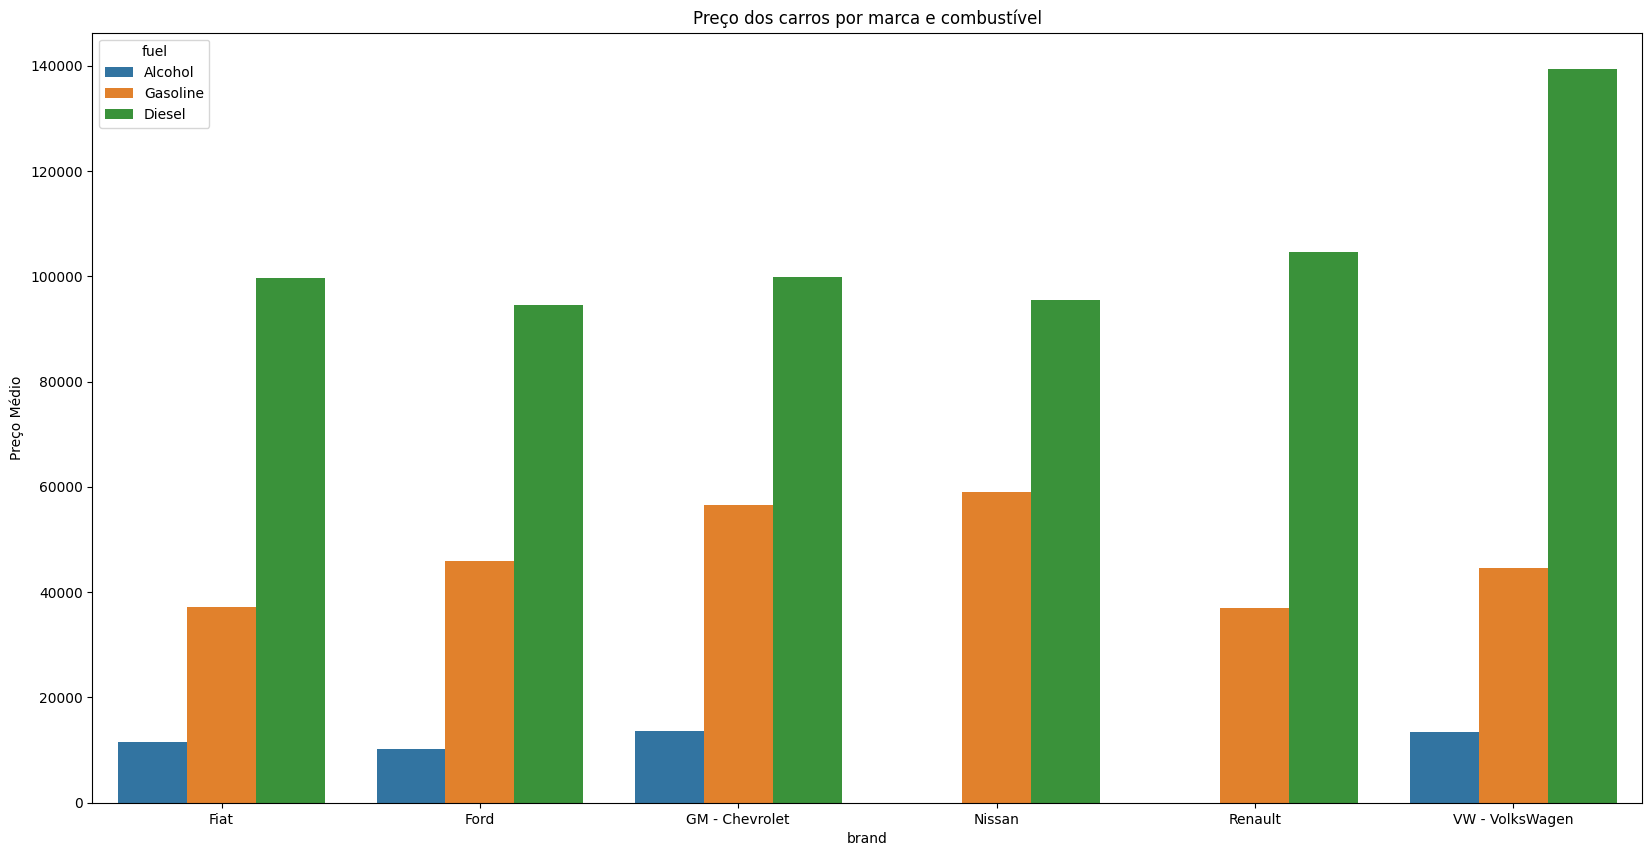

In [136]:
# Agrupa por marca e tipo de combustível
brand_fuel_avg_prices = dados.groupby(['brand', 'fuel'])['avg_price_brl'].mean()
# Filtrar para remover as linhas onde a marca é '-'
brand_fuel_avg_prices = brand_fuel_avg_prices[brand_fuel_avg_prices.index.get_level_values('brand') != '-']

# Resetando o índice para transformar a Series com índice multinível em um DataFrame
brand_fuel_avg_prices = brand_fuel_avg_prices.reset_index()

# Visualizando o preço dos carros por marca e combustível
plt.figure(figsize=(20,10))
sns.barplot(x='brand', y='avg_price_brl', hue='fuel', data=brand_fuel_avg_prices, hue_order=['Alcohol','Gasoline','Diesel'])
plt.title('Preço dos carros por marca e combustível')
plt.ylabel('Preço Médio')
plt.show()

In [158]:
brand_fuel_avg_prices

,brand,fuel,avg_price_brl
0,Fiat,Alcohol,11509.514419
1,Fiat,Diesel,99757.430176
2,Fiat,Gasoline,37201.239119
3,Ford,Alcohol,10148.906667
4,Ford,Diesel,94545.011648
5,Ford,Gasoline,45852.203511
6,GM - Chevrolet,Alcohol,13697.717687
7,GM - Chevrolet,Diesel,99838.038885
8,GM - Chevrolet,Gasoline,56513.109235
9,Nissan,Diesel,95413.834883


# 3 Aplicação de modelos de machine learning para prever o preço médio dos carros

#### A partir da base de dados precos_carros_brasil.csv, execute as seguintes tarefas:

#### a. Escolha as variáveis numéricas (modelos de Regressão) para serem as variáveis independentes do modelo.A variável target é avg_price. Observação: caso julgue necessário, faça a transformação de variáveis categóricas em variáveis numéricas para inputar no modelo. Indique quais variáveis foram transformadas e como foram transformadas

In [137]:
dados.dtypes

year_of_reference       Int64
month_of_reference     object
brand                  object
fuel                   object
gear                   object
engine_size           float64
year_model              Int64
avg_price_brl         float64
dtype: object

In [138]:
# Cria uma instância do LabelEncoder
le = LabelEncoder()

# Convertendo colunas para numéricos
dados['brand'] = le.fit_transform(dados['brand']) 
print(dict(zip(le.classes_, le.transform(le.classes_))))
dados['fuel'] = le.fit_transform(dados['fuel']) 
print(dict(zip(le.classes_, le.transform(le.classes_))))
dados['gear'] = le.fit_transform(dados['gear']) 
print(dict(zip(le.classes_, le.transform(le.classes_))))
dados['month_of_reference'] = le.fit_transform(dados['month_of_reference']) 
print(dict(zip(le.classes_, le.transform(le.classes_))))
dados.head()

{'Fiat': 0, 'Ford': 1, 'GM - Chevrolet': 2, 'Nissan': 3, 'Renault': 4, 'VW - VolksWagen': 5}
{'Alcohol': 0, 'Diesel': 1, 'Gasoline': 2}
{'automatic': 0, 'manual': 1}
{'April': 0, 'August': 1, 'December': 2, 'February': 3, 'January': 4, 'July': 5, 'June': 6, 'March': 7, 'May': 8, 'November': 9, 'October': 10, 'September': 11}


,year_of_reference,month_of_reference,brand,fuel,gear,engine_size,year_model,avg_price_brl
0,2021,4,2,2,1,1.0,2002,9162.0
1,2021,4,2,2,1,1.0,2001,8832.0
2,2021,4,2,2,1,1.0,2000,8388.0
3,2021,4,2,0,1,1.0,2000,8453.0
4,2021,4,2,2,1,1.6,2001,12525.0


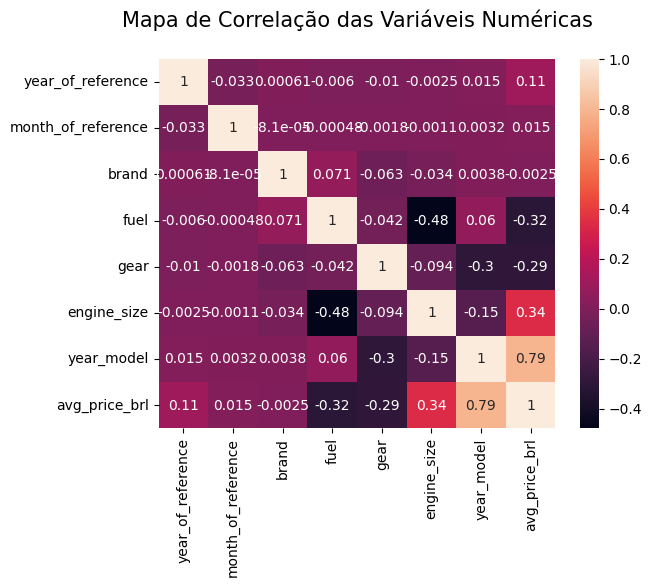

In [139]:
# Mapa de correlação das variáveis numéricas com variável Target
sns.heatmap(dados.corr("spearman"), annot = True)
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

In [140]:
# Variável X contém apenas variáveis numéricas de interesse para a análise, excluindo a variável target 
X = dados.drop(['avg_price_brl'],axis = 1)
X.head()

,year_of_reference,month_of_reference,brand,fuel,gear,engine_size,year_model
0,2021,4,2,2,1,1.0,2002
1,2021,4,2,2,1,1.0,2001
2,2021,4,2,2,1,1.0,2000
3,2021,4,2,0,1,1.0,2000
4,2021,4,2,2,1,1.6,2001


In [141]:
# Variável Y contém apenas a variável target - avg_price_brl
Y = dados['avg_price_brl']
Y.head()

0     9162.0
1     8832.0
2     8388.0
3     8453.0
4    12525.0
Name: avg_price_brl, dtype: float64

#### b. Crie partições contendo 75% dos dados para treino e 25% para teste

In [142]:
# Divisão: 25% dos dados são de teste e 75% de treinamento
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

#### c. Treine modelos RandomForest (biblioteca RandomForestRegressor) e XGBoost (biblioteca XGBRegressor) para predição dos preços dos carros. Observação: caso julgue necessário, mude os parâmetros dos modelos e rode novos modelos. Indique quais parâmetros foram inputados e indique o treinamento de cada modelo

##### MODELO RANDOMFOREST ***********************************************************************************************************

In [143]:
# Algoritmo Random Forest, sem especificar nenhum parâmetro (número de árvores, número de ramificações, etc)
model_rf = RandomForestRegressor()
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf.fit(X_train, Y_train)

RandomForestRegressor()

#### d. Grave os valores preditos em variáveis criadas (( RandomForest ))

In [144]:
# Predição dos valores de preço com base nos dados de teste
valores_preditos_rf = model_rf.predict(X_test)

In [145]:
# Valores preditos
valores_preditos_rf

array([51249.8983191 , 49871.88685714, 63367.67215368, ...,
       22025.54533333, 52892.50050571, 34523.00683272])

#### e. Realize a análise de importância das variáveis para estimar a variável target (( RandomForest ))

In [146]:
# Analisando importancia das variáveis
model_rf.feature_importances_
feature_importances = pd.DataFrame(model_rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.474463
year_model,0.400533
gear,0.038072
fuel,0.035508
brand,0.026126
year_of_reference,0.013166
month_of_reference,0.012132


In [147]:
# Calculando MSE - erro quadrático médio das predições do nosso modelo. Quanto maior o MSE, pior é o modelo.
mse = mean_squared_error(Y_test, valores_preditos_rf)
mse

136808474.66144556

In [148]:
# Calculando MAE - média da diferença absoluta entre o valor predito e o valor real.
mae = mean_absolute_error(Y_test, valores_preditos_rf)
mae

5913.1826603508525

In [159]:
# Calculando R² - métrica que varia entre 0 e 1 e é uma razão que indica o quão bom o nosso modelo. Quanto maior seu valor, melhor é o modelo
r2_score(Y_test, valores_preditos_rf)

0.9476690415808797

In [160]:
model_rf_parametros = RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28,
                       n_estimators=208, random_state=43)

# Ajuste do modelo, de acordo com as variáveis de treinamento
model_rf_parametros.fit(X_train, Y_train)

RandomForestRegressor(max_depth=29, min_samples_leaf=32, min_samples_split=28,
                      n_estimators=208, random_state=43)

In [151]:
# Predição dos valores de preço médio com base nos dados de teste
valores_preditos_rf_parametros = model_rf_parametros.predict(X_test)

In [152]:
model_rf_parametros.feature_importances_
feature_importances = pd.DataFrame(model_rf_parametros.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.482331
year_model,0.420785
fuel,0.037639
gear,0.026134
brand,0.020555
year_of_reference,0.010988
month_of_reference,0.001568


In [179]:
mse = mean_squared_error(Y_test, valores_preditos_rf_parametros)
mae = mean_absolute_error(Y_test, valores_preditos_rf_parametros)
print ("MSE:", mse)
print ("MSA:", mae)
print ("R2: ", r2_score(Y_test, valores_preditos_rf_parametros))
#r2_score(Y_test, valores_preditos_rf_parametros)

MSE: 178879996.34299704
MSA: 6180.685701226536
R2:  0.9315761565663022


##### MODELO XGBOOST *****************************************************************************************************************

In [154]:
model_xgboost = XGBRegressor()
# Ajuste do modelo, de acordo com as variáveis de treinamento
model_xgboost.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#### d. Grave os valores preditos em variáveis criadas (( XGBoost ))

In [155]:
# Predição dos valores de preço do carro com base nos dados de teste
valores_preditos_xgboost = model_xgboost.predict(X_test)
valores_preditos_xgboost

array([53827.82 , 53653.785, 65907.87 , ..., 21213.66 , 52330.73 ,
       34859.742], dtype=float32)

#### e. Realize a análise de importância das variáveis para estimar a variável target (( XGBoost ))

In [156]:
model_xgboost.feature_importances_
feature_importances = pd.DataFrame(model_xgboost.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance', ascending = False)
feature_importances

,importance
engine_size,0.390421
year_model,0.273714
fuel,0.140712
gear,0.130883
brand,0.039483
year_of_reference,0.020064
month_of_reference,0.004723


In [178]:
mse = mean_squared_error(Y_test, valores_preditos_xgboost)
mae = mean_absolute_error(Y_test, valores_preditos_xgboost)
print ("MSE:", mse)
print ("MSA:", mae)
print ("R2: ", r2_score(Y_test, valores_preditos_xgboost))
#print ("MSE:", mse)
#print ("MSA:", mae)


MSE: 102136185.54811385
MSA: 5401.252984887285
R2:  0.9609316272823546
